In [1]:
import sys

sys.path.append('/home/stsapoui/Project/LDA-similarity-Project-/Class')

from Dataset_function import *
from Preprocess import *
from TopicModel import *
from LdaAnalysis import *
from Inference import *
from Similarity import *

In [2]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy import stats
from scipy.stats import shapiro

/home/stsapoui/Project/env/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [3]:
data_train, abstract_train, body_train, data_val, abstract_val, body_val = extract_Paper("CiteSeerX")

oai:CiteSeerX.psu:10.1.1.1.6092 not found


In [4]:
data_eval, abstract_eval, body_eval = extract_Evaluation()

arXiv:2010.10614 not found
arXiv:2011.01098 not found
arXiv:2011.10319 not found
arXiv:2101.05177 not found
arXiv:2103.04283 not found
arXiv:2103.07395 not found
arXiv:2104.04604 not found
arXiv:2105.06877 not found
arXiv:2106.00844 not found
arXiv:2106.01726 not found
arXiv:2106.10081 not found
arXiv:2107.01621 not found
arXiv:2107.02679 not found
arXiv:2107.08921 not found
arXiv:2107.09333 not found
arXiv:2107.11834 not found


In [5]:
data_eval

Title  \
arXiv:1506.02082  A Real-time Cargo Damage Management System via...   
arXiv:1810.06992  Topographic Representation for Quantum Machine...   
arXiv:2005.06964                Big Computing: Where are we heading   
arXiv:2005.07531  6G Communications: A Vision on the Potential A...   
arXiv:2006.02107                  KCN: Knowledge Centric Networking   
...                                                             ...   
arXiv:2107.13066  Removing Operational Friction Using Process Mi...   
arXiv:2107.13069  Tensor diagrams and cluster combinatorics at p...   
arXiv:2107.13299                         Trees and Homogeneous LOTS   
arXiv:2107.13320  A Case Study on the Stability of Performance T...   
arXiv:2107.13418                 The mystery of energy compensation   

                                                             Author  Date  \
arXiv:1506.02082  {"Philip B. Alipour","Matteus Magnusson","Mart...  None   
arXiv:1810.06992                                {"Bruce MacLennan"}  None   
arXiv:2005.06964  {"Sabuzima Nayak","Ripon Patgiri","Thoudam Dor...  None   
arXiv:2005.07531                 {"Sabuzima Nayak","Ripon Patgiri"}  None   
arXiv:2006.02107  {"Marinos Charalambides","Daphne Tuncer","Ning...  None   
...                                                             ...   ...   
arXiv:2107.13066  {"Wil van der Aalst","Tobias Brockhoff","Anahi...  None   
arXiv:2107.13069                {"Chris Fraser","Pavlo Pylyavskyy"}  None   
arXiv:2107.13299                     {"Ethan Akin","Karel Hrbacek"}  None   
arXiv:2107.13320  {"Simon Eismann","Diego Elias Costa","Lizhi Li...  None   
arXiv:2107.13418                                {"Lewis G. Halsey"}  None   

                 Journal     Field                        Classification  
arXiv:1506.02082    None  computer                               [cs.AI]  
arXiv:1810.06992    None  computer            [cs.LG, quant-ph, stat.ML]  
arXiv:2005.06964    None  computer                               [cs.DC]  
arXiv:2005.07531    None  computer                               [cs.NI]  
arXiv:2006.02107    None  computer                               [cs.NI]  
...                  ...       ...                                   ...  
arXiv:2107.13066    None  computer                        [cs.DB, cs.LG]  
arXiv:2107.13069    None      math                             [math.CO]  
arXiv:2107.13299    None      math                    [math.GN, math.DS]  
arXiv:2107.13320    None  computer                        [cs.DC, cs.SE]  
arXiv:2107.13418    None  biologie  [q-bio.OT, physics.bio-ph, q-bio.PE]  

[431 rows x 6 columns]

In [5]:
body_eval1 = Preprocessing1("body_eval1",body_eval,list(data_eval.index))
body_eval1.execute()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [6]:
abstract_eval1 = Preprocessing1("abstract_eval1",abstract_eval,list(data_eval.index))
abstract_eval1.execute()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [7]:
body_eval1.save("Saved Data")
abstract_eval1.save("Saved Data")

In [6]:
body_eval1 = Preprocessing1('body_eval1')
body_eval1.load('Saved Data/body_eval1.pickle')

abstract_eval1 = Preprocessing1('abstract_eval1')
abstract_eval1.load('Saved Data/abstract_eval1.pickle')

In [7]:
body_eval1.create_dictionary()
print(body_eval1.get_dictionary())
abstract_eval1.create_dictionary()
print(abstract_eval1.get_dictionary())

Dictionary(42656 unique tokens: ['ability.n.01', 'accept.v.11', 'access.v.01', 'accurate.a.01', 'achieve.v.01']...)
Dictionary(4346 unique tokens: ['actuallydamaged', 'agent.n.05', 'apostasy.n.01', 'calculate.v.05', 'cargo.n.01']...)


In [8]:
final_lda_body1 = LDAMallet("final_lda_body1", _)
final_lda_body1.load("Saved Data/final_lda_body1.pickle")

final_lda_abstract1_v2 = LDAMallet("final_lda_abstract1_v2", _)
final_lda_abstract1_v2.load("Saved Data/final_lda_abstract1_v2.pickle")

In [7]:
inference_body_eval1 = Inference('inference_body_eval1', final_lda_body1, body_eval1) 

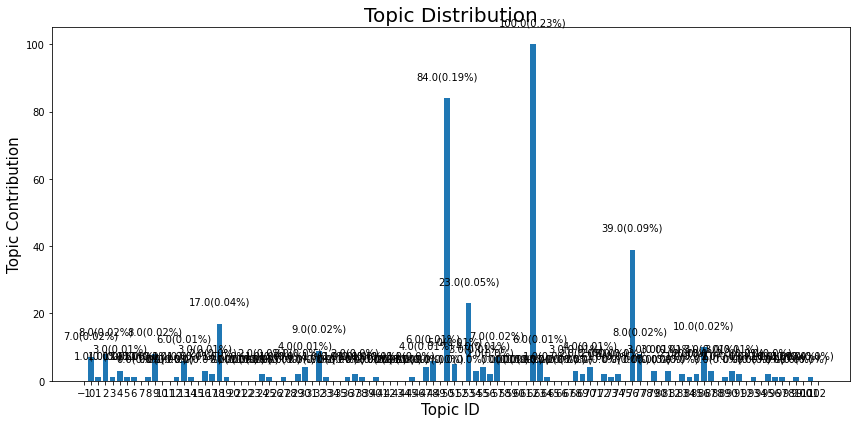

In [8]:
inference_body_eval1.get_model().topic_repartition()

In [9]:
inference_body_eval1.save("Saved Data")

In [9]:
inference_abstract_eval1_v2 = Inference('inference_abstract_eval1_v2', final_lda_abstract1_v2, abstract_eval1) 

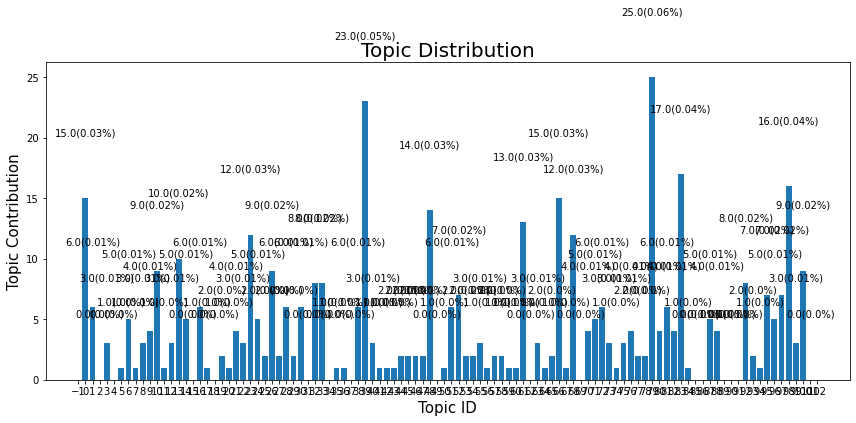

In [10]:
inference_abstract_eval1_v2.get_model().topic_repartition()

In [11]:
inference_abstract_eval1_v2.save("Saved Data")

### Start to run here

In [5]:
body_eval1 = Preprocessing1('body_eval1')
body_eval1.load('Saved Data/body_eval1.pickle')

abstract_eval1 = Preprocessing1('abstract_eval1')
abstract_eval1.load('Saved Data/abstract_eval1.pickle')

final_lda_body1 = LDAMallet("final_lda_body1", _)
final_lda_body1.load("Saved Data/final_lda_body1.pickle")

final_lda_abstract1_v2 = LDAMallet("final_lda_abstract1_v2", _)
final_lda_abstract1_v2.load("Saved Data/final_lda_abstract1_v2.pickle")

inference_body_eval1 = Inference('inference_body_eval1', final_lda_body1, body_eval1) 
inference_abstract_eval1_v2 = Inference('inference_abstract_eval1_v2', final_lda_abstract1_v2, abstract_eval1) 

In [6]:
final_lda_body1.compute_Word_Topic_Distribution()
final_lda_abstract1_v2.compute_Word_Topic_Distribution()

inference_body_eval1.get_model().compute_Word_Topic_Distribution()
inference_abstract_eval1_v2.get_model().compute_Word_Topic_Distribution()

### Defining tag list from the evaluation set

In [7]:
tag = [elem for liste in list(data_eval["Classification"]) for elem in liste]
tag = list(set(tag))

In [8]:
tag

['cond-mat.quant-gas',
 'physics.acc-ph',
 'physics.optics',
 'cs.PL',
 'cs.AI',
 'q-bio.PE',
 'math.AP',
 'q-bio.GN',
 'cond-mat.dis-nn',
 'eess.AS',
 'quant-ph',
 'math.CO',
 'cs.NE',
 'cs.ET',
 'cs.PF',
 'cs.SI',
 'q-bio.QM',
 'physics.app-ph',
 'math.OC',
 'cs.DC',
 'q-bio.TO',
 'cs.HC',
 'cs.NI',
 'stat.ML',
 'physics.med-ph',
 'math.AT',
 'q-bio.MN',
 'math-ph',
 'stat.AP',
 'astro-ph.HE',
 'cond-mat.stat-mech',
 'cs.IT',
 'cs.CR',
 'cs.CV',
 'nlin.CG',
 'cs.RO',
 'cond-mat.other',
 'math.AG',
 'cs.CL',
 'math.GR',
 'math.AC',
 'eess.IV',
 'physics.bio-ph',
 'cs.SD',
 'physics.comp-ph',
 'hep-th',
 'math.RA',
 'q-bio.CB',
 'q-bio.OT',
 'astro-ph.GA',
 'cs.DM',
 'physics.data-an',
 'cs.FL',
 'hep-lat',
 'cond-mat.mtrl-sci',
 'cs.CE',
 'math.CT',
 'math.GT',
 'gr-qc',
 'nlin.PS',
 'cond-mat.mes-hall',
 'math.DG',
 'math.QA',
 'math.NT',
 'math.LO',
 'astro-ph.SR',
 'stat.ME',
 'eess.SP',
 'cs.LG',
 'math.OA',
 'math.FA',
 'cs.DS',
 'math.NA',
 'cs.LO',
 'physics.soc-ph',
 'cond-mat

### At this point, we will try two different ways to calculate similarity between two documents

### The list of avalaible measure

In [9]:
measures = ["JSD","cosine","chebyshev","L2","minkowski", "braycurtis", "canberra", "manhattan", "correlation"]

In [10]:
similarity = SimilarityV2('Similarity1_v2', final_lda_abstract1_v2, final_lda_body1, inference_abstract_eval1_v2, inference_body_eval1)

One of the word doesn't have an equivalent in synset :  graph.v.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  edge.n.06  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  node.n.08  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  vertex.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  connect.v.11  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  way.n.05  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  topology.n.04  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word does

One of the word doesn't have an equivalent in synset :  television_camera.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  movement.n.03  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  status.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  skeletal_system.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  have.v.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  order_magnitude  So we can't apply Wu-Palmer  with it


One of the word doesn't have an equivalent in synset :  water_system.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  increase.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  swim.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  pisces.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  speed.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  group.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  r

One of the word doesn't have an equivalent in synset :  test.v.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subject.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  standard.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  token.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  render.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  who

One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  surface.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  volume.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  plane.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  recons

One of the word doesn't have an equivalent in synset :  search.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  optimization.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  population.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  serve.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalen

One of the word doesn't have an equivalent in synset :  price.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  partition.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tie.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  size.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminus.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  type.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  predicate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset : 

One of the word doesn't have an equivalent in synset :  render.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  texture.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  view.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  surface.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  graphic.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tracing.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tr

One of the word doesn't have an equivalent in synset :  quality.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  recognition.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  road.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  vehicle.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  symbol.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  throw.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  wrinkle.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :

One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  overture.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  performance.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  standard.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  technique.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equival

One of the word doesn't have an equivalent in synset :  information.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  share.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  cognition.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  know.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  task.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  situation.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  source.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset 

One of the word doesn't have an equivalent in synset :  object.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  reference_book.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  produce.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  move.v.16  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  building.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  table.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  database.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  packet.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stream.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  loss.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  delay.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  queue.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  size.v.

One of the word doesn't have an equivalent in synset :  lecture.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subject.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  survey.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  speaker.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  utterance.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  task.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset 

One of the word doesn't have an equivalent in synset :  remark.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  output.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  switch_over.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  port.v.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  wavelength.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in sy

One of the word doesn't have an equivalent in synset :  steering.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  move.v.16  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  detector.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  overture.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  experiment.v.01 middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  automaton.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  environment.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  obstacle.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in sy

One of the word doesn't have an equivalent in synset :  stipulate.v.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  demeanor.n.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  define.v.02  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  property.n.05  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tone.n.09 peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  model.v.06  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  typify.v.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  value.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  serve.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  parameter.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subject.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  standard.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  network.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  traffic.v.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  router.n.03  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stream.n.04  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  world.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  packet.n.03  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  address.v.06  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  topology.n.04  toolkit  S

One of the word doesn't have an equivalent in synset :  service.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  resource.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  context.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  supplier.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  provide.v.06  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  management.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the

One of the word doesn't have an equivalent in synset :  component.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  simulation.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  demeanor.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  quantity.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  overture.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  define.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tied.s.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in sy

One of the word doesn't have an equivalent in synset :  detector.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  fusion.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  root.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  energy.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sinkhole.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset : 

One of the word doesn't have an equivalent in synset :  course.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  weave.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  visit.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  object.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  view.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  java.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  code.v.01

One of the word doesn't have an equivalent in synset :  mistake.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  signal_detection.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  detect.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  failure.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  dependability.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  lawsuit.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equi

One of the word doesn't have an equivalent in synset :  region.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  curve.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trace.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  shape.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  incorporate.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  form.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  dia

One of the word doesn't have an equivalent in synset :  system.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  prediction.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  threshold.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  signal.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  noise.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  word_picture.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  disparity.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  predict.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivale

One of the word doesn't have an equivalent in synset :  state.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  syndicate.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  right.s.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  year.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tree.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tenure.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tug.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  family

One of the word doesn't have an equivalent in synset :  text_file.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  question.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminus.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  search.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  retrieval.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  word.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  remember.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent i

One of the word doesn't have an equivalent in synset :  equation.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  mesh_topology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stream.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  element.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalen

One of the word doesn't have an equivalent in synset :  yoke.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  delay.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  packet.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  traffic.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  bandwidth.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  period.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  

One of the word doesn't have an equivalent in synset :  have.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  train.v.09  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  classification.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  classifier.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  course.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  learn.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tag.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :

One of the word doesn't have an equivalent in synset :  cluster.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  distance.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  similarity.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  standard.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  story.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  have.v.02  to

One of the word doesn't have an equivalent in synset :  placement.n.03  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  coordinate.n.01  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  localization.n.01  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  estimate.n.05  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  landmark.n.04  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  distance.v.01  parameterization  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  measurement.n.01 parameterization  So we can't apply Wu-Palm

One of the word doesn't have an equivalent in synset :  solution.n.02  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  fact.n.04  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tied.s.05  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  type.v.02  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01 peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  increase.n.03  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  state.n.04  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  perce

One of the word doesn't have an equivalent in synset :  vector.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  matrix.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  calculate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  space.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  overlap.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  equation.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :

One of the word doesn't have an equivalent in synset :  source.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  negotiation.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  probe.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  section.n.13  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  value.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  ac

One of the word doesn't have an equivalent in synset :  trope.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  color.v.05  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  show.v.12  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  have.v.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  pixel.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  peer.n.01  toolkit  So we can't ap

One of the word doesn't have an equivalent in synset :  use.v.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  system.n.02  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  encode.v.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sting.v.02  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  pulley.n.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.02 peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  token.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  suppor

One of the word doesn't have an equivalent in synset :  processor.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  teaching.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  calculation.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  value.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  benchmark.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  parameter.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent

One of the word doesn't have an equivalent in synset :  filter.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stove.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  search.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  address.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  model.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  peer.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset 

One of the word doesn't have an equivalent in synset :  waiter.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  request.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  session.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  warhead.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  service.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  workload.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset 

One of the word doesn't have an equivalent in synset :  master.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  restrainer.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  feedback.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  plan.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stipulate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  system.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  remark.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  tuples  master.v.04  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  schedule.v.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  policy.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  time.v.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  show.v.12  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  solution.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  performance.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  derive.v.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  delegate.v.02  So w

One of the word doesn't have an equivalent in synset :  tuples  grow.v.08  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  project.v.06  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  trace.v.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  research.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  paper.n.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  take.v.27  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  involve.v.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  prototype.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  transport.v.02  So we c

One of the word doesn't have an equivalent in synset :  tuples  property.n.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  show.v.12  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  logic.n.05  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  verification.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  check_mark.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  reason.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  proof.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  raise.v.15  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  stipulate.v.01  S

One of the word doesn't have an equivalent in synset :  tuples  restraint.n.06  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  course.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  give.v.43  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  view.v.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  trouble.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  consistency.n.04  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  workplace.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  unfold.v.03  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tuples  stiffen.v.03  So

One of the word doesn't have an equivalent in synset :  probability.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  distribution.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  estimate.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sample_distribution.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  parameter.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't ha

One of the word doesn't have an equivalent in synset :  energy.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  world_power.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tour.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  increase.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  voltage.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  gate.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  show.v.12  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  f

One of the word doesn't have an equivalent in synset :  food.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  family.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  percentage.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  flood_tide.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  pulmonary_tuberculosis.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  child.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rice.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  indicator.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an eq

One of the word doesn't have an equivalent in synset :  mass.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  speed.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  particle.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  energy.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  equation.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  space.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  th

One of the word doesn't have an equivalent in synset :  frequency.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  estimate.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  strait.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  signal.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  spectrum.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  period.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  type.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  property.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  outline.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  information.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  example.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  description.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  element.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  resource.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalen

One of the word doesn't have an equivalent in synset :  active.a.11  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  type.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  show.v.12  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  coinage.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  interaction.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  element.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  alice resource.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice management.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice lotion.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice power_system.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice calculate.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice access.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice server.n.03  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice monitoring.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice mechanism.n.05  So we c

One of the word doesn't have an equivalent in synset :  alice effect.n.06  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice suggest.v.03  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice speed.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice whole.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice move.v.16  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice occur.v.03  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice rate.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice movement.n.10  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice swim.v.04  So we can't apply Wu-Palmer  with i

One of the word doesn't have an equivalent in synset :  alice simulation.n.02  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice world_power.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice simulate.v.03  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice use.v.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice noise.n.04  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice simulator.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice advantage.n.01  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice scale.v.08  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  alice turning.n.04  So we can't appl

One of the word doesn't have an equivalent in synset :  student.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  research.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  technology.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  teacher.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  project.v.06  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  growth.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  school.v.03  order_magnitude  So we can't apply Wu-Palmer  with it
One of

One of the word doesn't have an equivalent in synset :  workplace.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  home_plate.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  child.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  technology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  natural_process.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  syndicate.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equival

One of the word doesn't have an equivalent in synset :  take.v.27  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  mean.v.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  look.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  workplace.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  take.v.39  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  reason.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  know.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  option

One of the word doesn't have an equivalent in synset :  system.n.08  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  provide.v.06  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rate.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  root.n.03  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  let.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  produce.v.02  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  environment.n.02  toolkit  So we c

One of the word doesn't have an equivalent in synset :  stipulation.n.03  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  keep.v.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  vantage_point.n.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stage_set.n.01  peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  render.v.04 peertopeer So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  radiation_pattern.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  relationship.n.03  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't h

One of the word doesn't have an equivalent in synset :  classifier.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  natural_process.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  state.n.06  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  wages.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  environment.n.02  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  population.n.05  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  range.n.04  order_magnitude  So we can't apply Wu-Palmer  with it


One of the word doesn't have an equivalent in synset :  proof.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  theorem.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tie.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  define.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subject.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  take_after.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  denote.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  

One of the word doesn't have an equivalent in synset :  predicate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  proof.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  define.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subject.n.06 middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rule.n.11  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminus.n.03  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  definition.n.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  toolkit  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  variable.

One of the word doesn't have an equivalent in synset :  planning.n.01  tinyaspect  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  planning.n.01  exibility So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  tinyaspect  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  exibility So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  murder.n.01  tinyaspect  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  murder.n.01  exibility So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  planner.n.02  tinyaspect  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  planner.n.02  exibility So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stipulat

One of the word doesn't have an equivalent in synset :  division.n.12  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  movement.n.03  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  subspace.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  order_magnitude  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  estimate.n.05  order_magnitude  So we can't apply Wu-Palmer  with it
One of the

One of the word doesn't have an equivalent in synset :  peer.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  file.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  question.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  mediator.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  view.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  system.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  download.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  serve.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  n

One of the word doesn't have an equivalent in synset :  node.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  route.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rout.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  message.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  storehouse.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  neighbor.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  station.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  hoard.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  access.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phonograph_record.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  size.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  storehouse.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  pulley.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  file.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in sy

One of the word doesn't have an equivalent in synset :  sequence.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  operation.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  multiplication.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  expansion.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  integer.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  produce.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equ

One of the word doesn't have an equivalent in synset :  tree.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  node.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  structure.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  child.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  index.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  spa

One of the word doesn't have an equivalent in synset :  pulley.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  matrix.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  performance.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  size.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  implementation.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  format.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  show.v.12  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in sy

One of the word doesn't have an equivalent in synset :  concept.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  ontology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sexual_intercourse.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  cognition.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  world.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  note.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equival

One of the word doesn't have an equivalent in synset :  program.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  psychoanalysis.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  visit.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  loop_topology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  method.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  murder.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  statement.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equiva

One of the word doesn't have an equivalent in synset :  restraint.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  variable.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  value.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  world.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  search.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  consistency.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in

One of the word doesn't have an equivalent in synset :  gene.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  structure.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  protein.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sexual_conquest.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trust.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  saying.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  interaction.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent i

One of the word doesn't have an equivalent in synset :  software.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  plan.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  requirement.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  growth.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  tool.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  developer.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  computer_architecture.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equiv

One of the word doesn't have an equivalent in synset :  risk.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  marketplace.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  portfolio.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  failure.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  period.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  series.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  store.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  firm.s.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  type.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  serve.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  program.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  module.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  lock_in.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  code.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  m

One of the word doesn't have an equivalent in synset :  utility_program.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  strategy.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  player.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  auction.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  price.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  agent.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  mechanism.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  allotment.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivale

One of the word doesn't have an equivalent in synset :  algorithm.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  calculate.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  section.n.13  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  message.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  protocol.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  station.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  communication.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  receive.v.10  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  reply.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  recipient.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in

One of the word doesn't have an equivalent in synset :  cellular_telephone.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sphere.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  colony.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  rule.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  define.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  hot_spot.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  simulation.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent

One of the word doesn't have an equivalent in synset :  word.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  terminology.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  sentence.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  corpus.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  verb.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  grammar.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  textbook.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset 

One of the word doesn't have an equivalent in synset :  memory.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  smokestack.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  access.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  code.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  wrinkle.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  address.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  check_mark.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  space.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  data.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  operation.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  memory.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  computer_architecture.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  kernel.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stream.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent 

One of the word doesn't have an equivalent in synset :  lotion.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  device.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  interface.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  environment.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  support.v.09  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  computer_architecture.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  provide.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an eq

One of the word doesn't have an equivalent in synset :  question.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  solution.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  plan.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  union.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  data.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  storehouse.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trope.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  

One of the word doesn't have an equivalent in synset :  coefficient.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  transform.v.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  serve.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  ripple.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  footing.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  signal.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  filter.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synse

One of the word doesn't have an equivalent in synset :  event.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  variety.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  update.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  record.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  version.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  occur.v.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  cloc

One of the word doesn't have an equivalent in synset :  user.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  interface.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  display.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  system.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  view.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  choose.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  preference.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset : 

One of the word doesn't have an equivalent in synset :  task.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  policy.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  schedule.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  trouble.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  resource.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  priority.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  give.v.43  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset : 

One of the word doesn't have an equivalent in synset :  groove.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  transmittance.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  world_power.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  station.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  radio.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time_slot.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  transmit.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  master.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equival

One of the word doesn't have an equivalent in synset :  video_recording.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  stream.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  skeletal_system.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  medium.s.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  section.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  node.n.08  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  timbre.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  bandwidth.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equi

One of the word doesn't have an equivalent in synset :  attack.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  touch.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  security.n.09  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  system.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  adversary.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  attacker.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  use.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  plug.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset : 

One of the word doesn't have an equivalent in synset :  learn.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  network.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  train.v.09  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  remark.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  whole.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  layer.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  weight_unit.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  have.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  

One of the word doesn't have an equivalent in synset :  server.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  machine.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  monitoring.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  connection.n.07  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  phone_number.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  peer.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  waiter.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  lotion.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent 

One of the word doesn't have an equivalent in synset :  page.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  search.v.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  web_site.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  locomotive.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  yoke.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  access.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  residential_district.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  timbre.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivale

One of the word doesn't have an equivalent in synset :  track.n.11  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  target.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  measurement.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  estimate.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  state.n.06  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  time.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  filter.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  hypothesis.n.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in syn

One of the word doesn't have an equivalent in synset :  plot.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  player.n.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  musket_ball.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  shimmer.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  demeanor.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  take.v.27  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  move.v.16  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  creature.n.03  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset

One of the word doesn't have an equivalent in synset :  group.v.02  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  work.v.05  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  role.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  organization.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  penis.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  business.n.04  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  natural_process.n.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent in synset :  structure.v.01  middleware  So we can't apply Wu-Palmer  with it
One of the word doesn't have an equivalent

### Visualization of the similarity score distribution with a target document and the entire training set

In [14]:
similarity.most_similar_sorted(0, measures, 0.5)

[('oai:CiteSeerX.psu:10.1.1.1.2803', 1.0),
 ('oai:CiteSeerX.psu:10.1.1.1.6819', 0.9110404644764251),
 ('oai:CiteSeerX.psu:10.1.1.1.6714', 0.9101096507297922),
 ('oai:CiteSeerX.psu:10.1.1.1.2376', 0.9043932071931611),
 ('oai:CiteSeerX.psu:10.1.1.1.4875', 0.9009118221766849),
 ('oai:CiteSeerX.psu:10.1.1.1.4200', 0.8923925179562446),
 ('oai:CiteSeerX.psu:10.1.1.1.2512', 0.8806854293547032),
 ('oai:CiteSeerX.psu:10.1.1.1.6419', 0.8683852640107123),
 ('oai:CiteSeerX.psu:10.1.1.1.3486', 0.8653628720421147),
 ('oai:CiteSeerX.psu:10.1.1.1.2930', 0.8611929092927282),
 ('oai:CiteSeerX.psu:10.1.1.1.4465', 0.8610202217142527),
 ('oai:CiteSeerX.psu:10.1.1.1.3135', 0.8601758362836956),
 ('oai:CiteSeerX.psu:10.1.1.1.3325', 0.8571779785342485),
 ('oai:CiteSeerX.psu:10.1.1.1.5349', 0.8561550549155605),
 ('oai:CiteSeerX.psu:10.1.1.1.6074', 0.855785293107337),
 ('oai:CiteSeerX.psu:10.1.1.1.6379', 0.8541156558995461),
 ('oai:CiteSeerX.psu:10.1.1.1.6822', 0.8514334066952831),
 ('oai:CiteSeerX.psu:10.1.1.1.

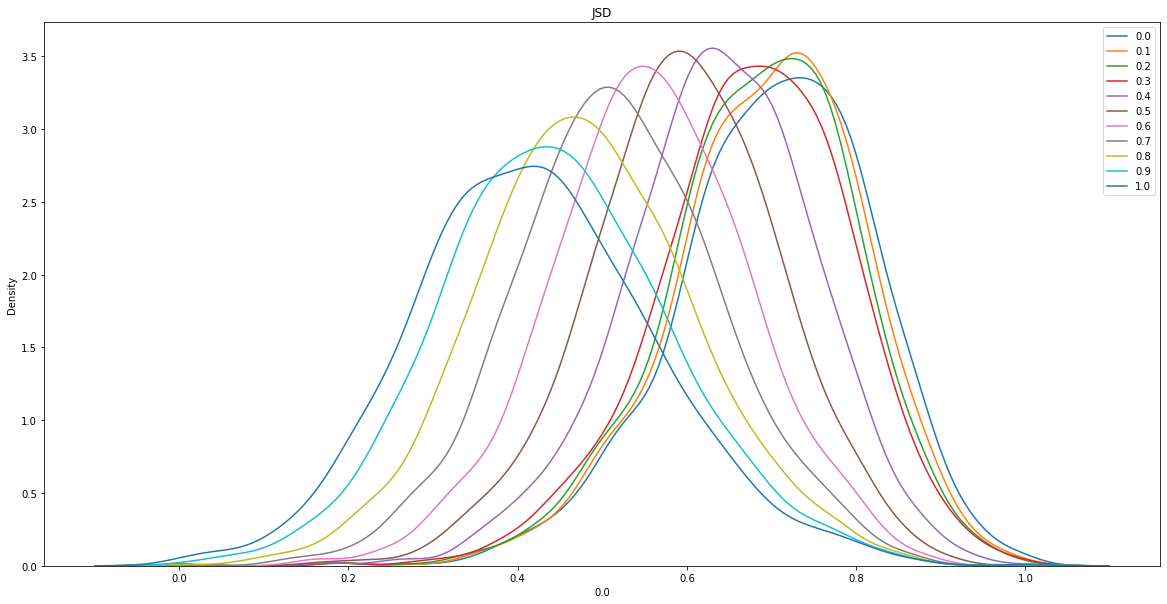

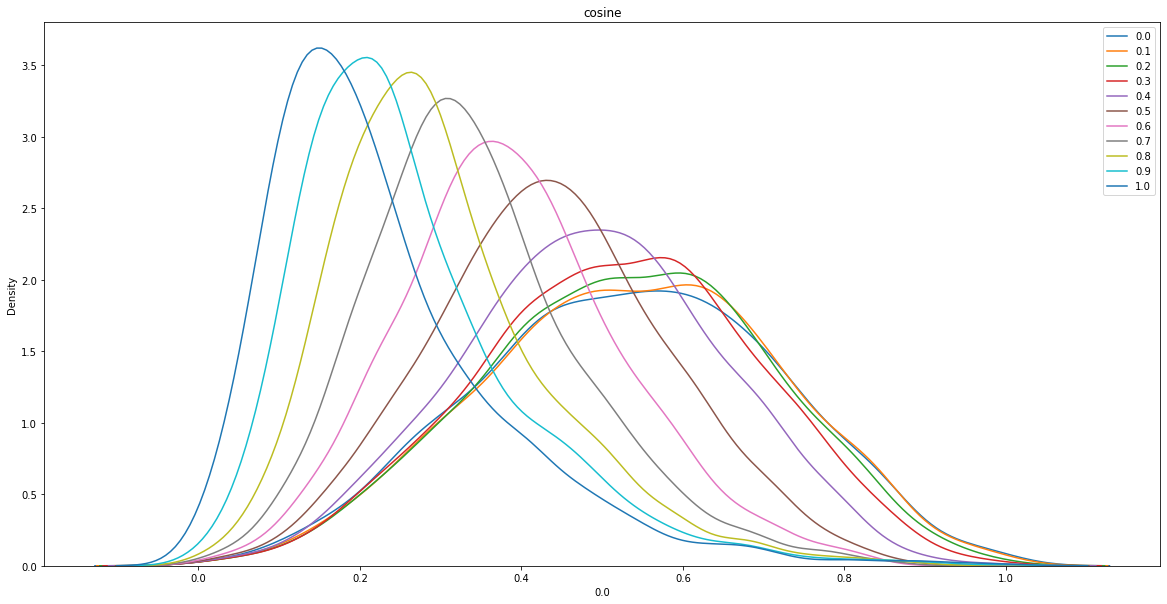

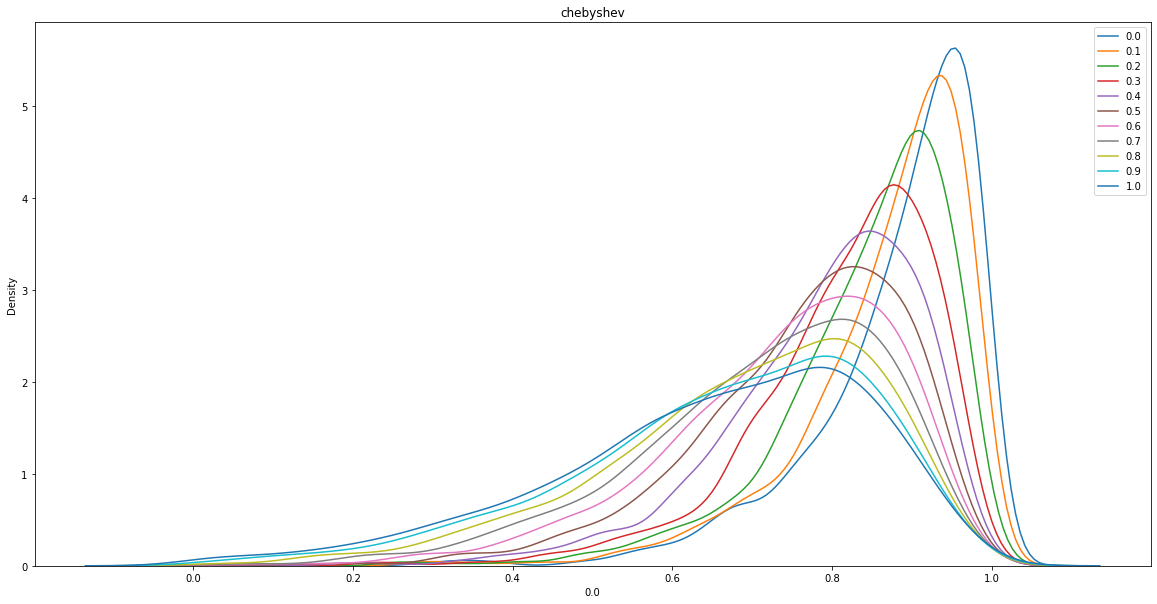

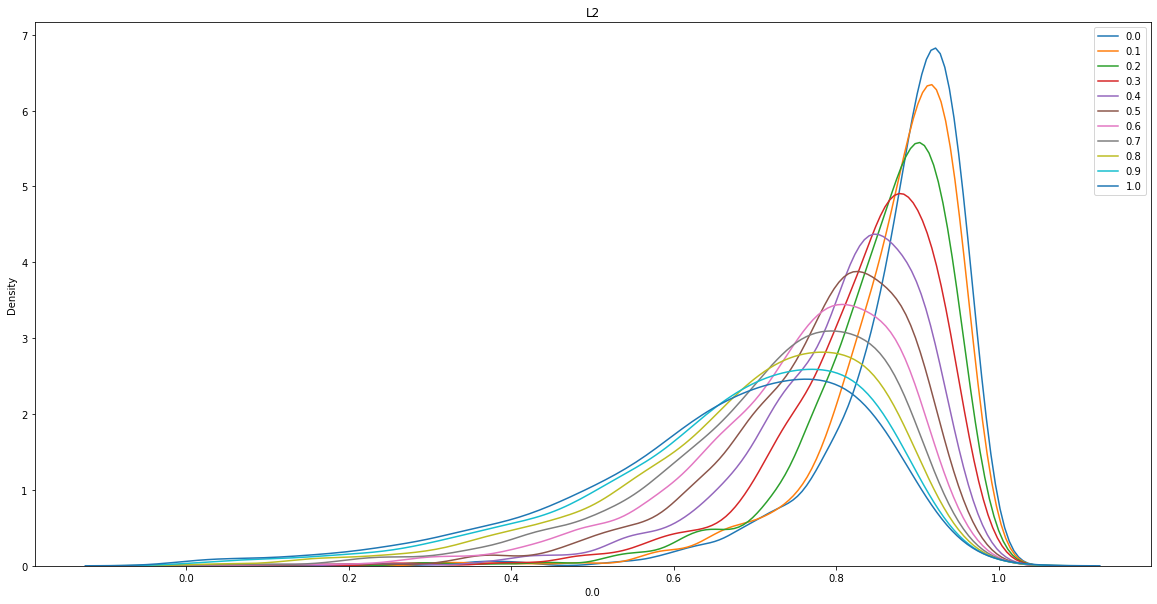

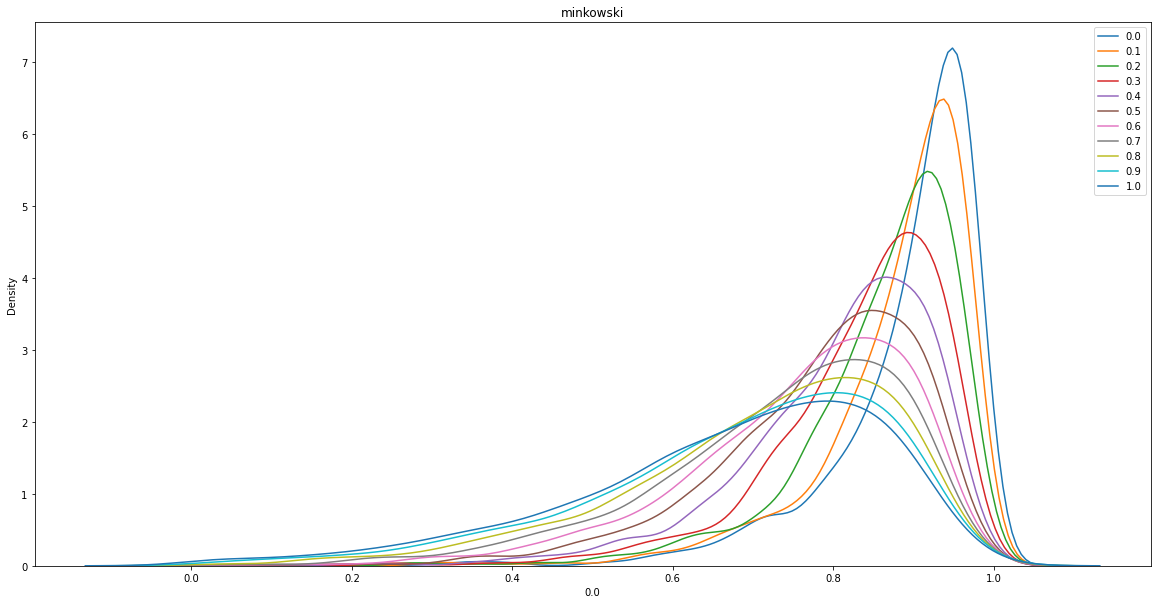

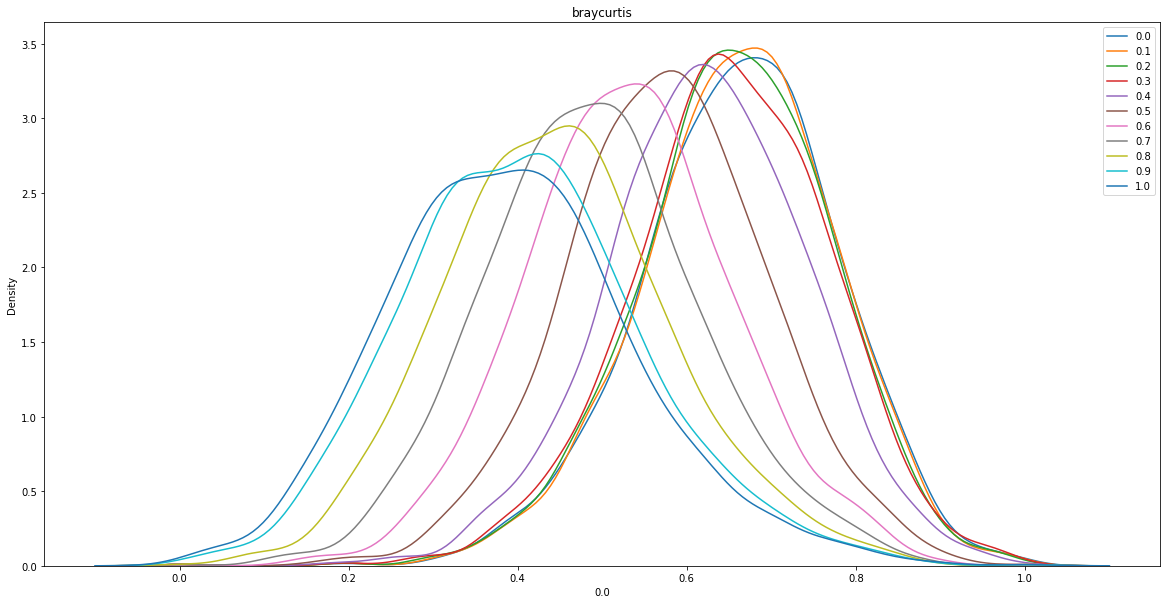

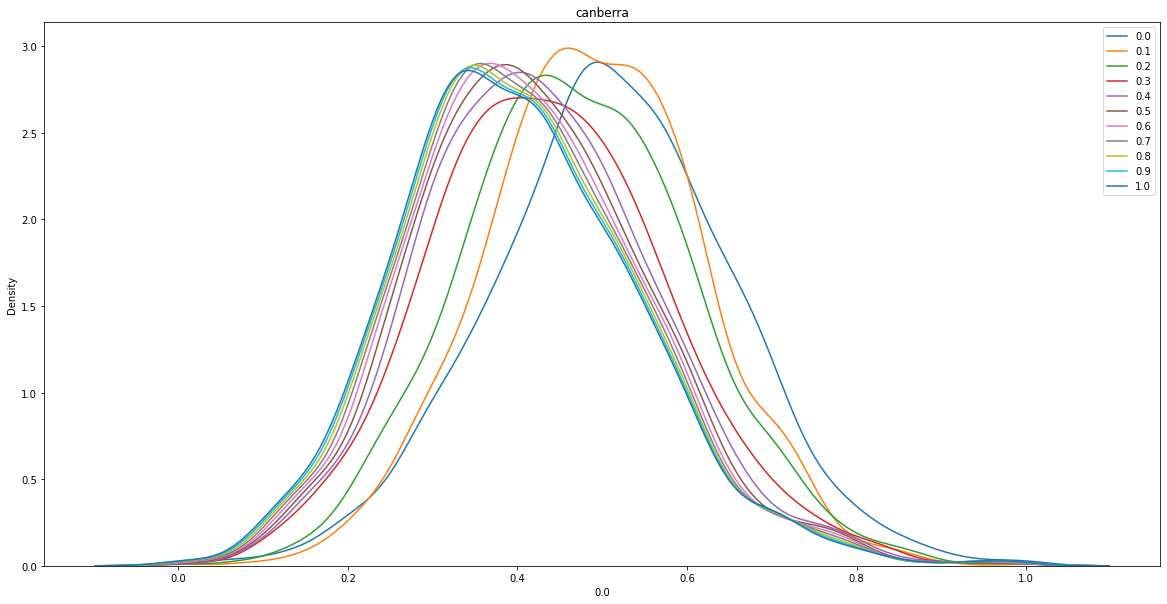

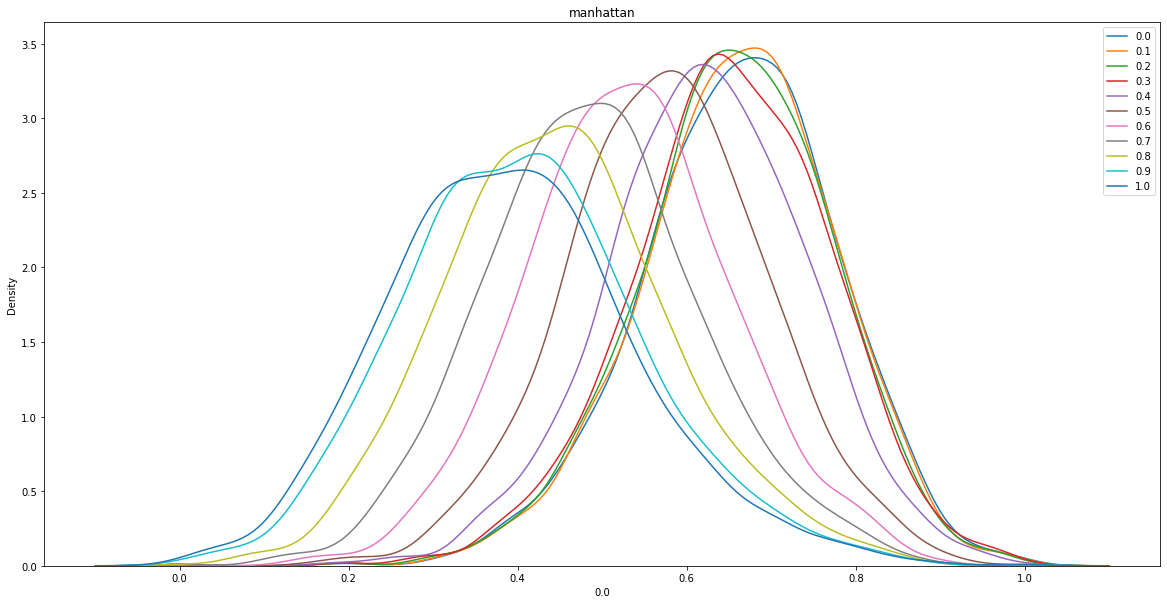

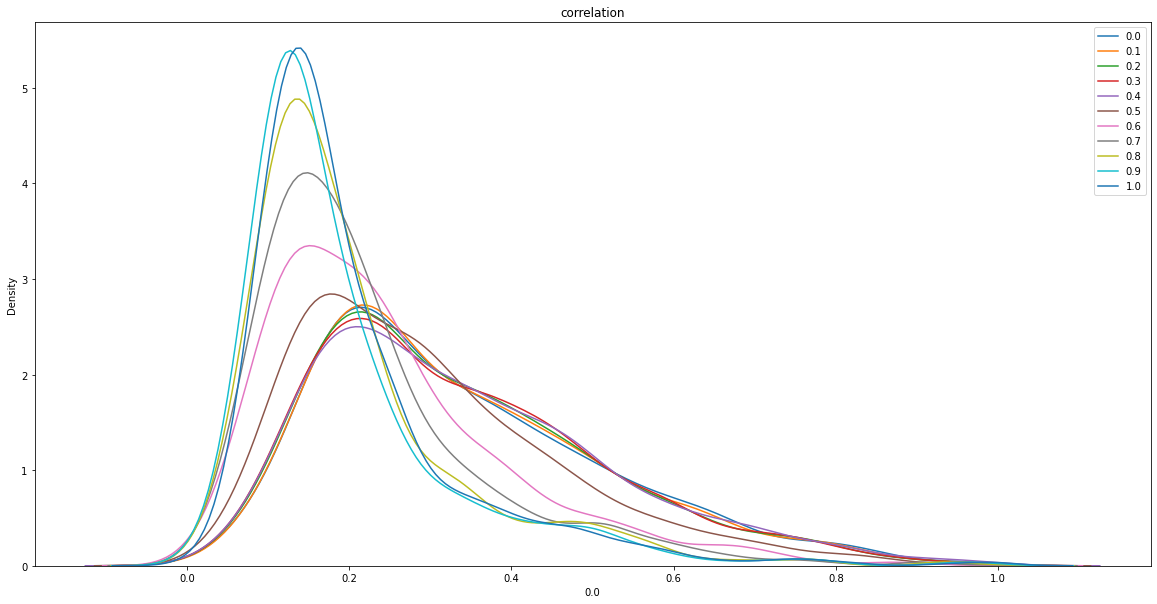

In [15]:
similarity.similarity_distribution(0, measures)

### Measure Normalisation

In [16]:
ms = {measure : [] for measure in measures}
for measure in measures:
    ms1 = similarity.most_similar_sorted(0, measure, 0.5)
    ms1 = np.array([m[1] for m in ms1])
    ms[measure] += list(ms1)

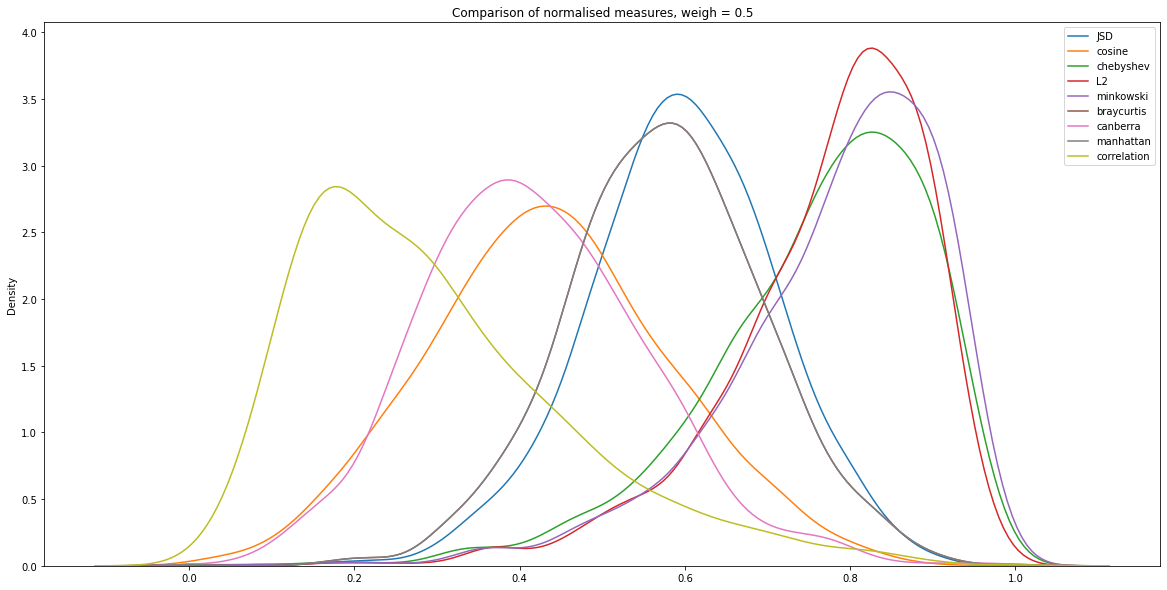

In [17]:
fig = plt.figure(1, figsize=(20, 10))
for measure in measures:
    sns.kdeplot(ms[measure], label=measure)
plt.legend() 
plt.title('Comparison of normalised measures, weigh = 0.5')
plt.show()

    We can make 5 groups
    We verify that we have superposition between Manhattan and Braycurtis curve, because they are the same on normalized data
    We will keep Manhattan

In [11]:
measures.remove('braycurtis')

### Shapiro test to see if the distribution is normal

In [19]:
for measure in measures:
    shapiro_test = stats.shapiro((ms[measure]-np.mean(ms[measure]))/np.std(ms[measure]))
    print(measure, shapiro_test)

JSD ShapiroResult(statistic=0.9951022267341614, pvalue=5.0684710004134104e-05)
cosine ShapiroResult(statistic=0.9985498785972595, pvalue=0.2064780294895172)
chebyshev ShapiroResult(statistic=0.9304330945014954, pvalue=1.8993742978676513e-26)
L2 ShapiroResult(statistic=0.9101424813270569, pvalue=1.580489281494142e-29)
minkowski ShapiroResult(statistic=0.9125633835792542, pvalue=3.4355448534646506e-29)
canberra ShapiroResult(statistic=0.991822361946106, pvalue=1.1111561093457567e-07)
manhattan ShapiroResult(statistic=0.9978743195533752, pvalue=0.037299662828445435)
correlation ShapiroResult(statistic=0.9320027232170105, pvalue=3.5036483651925573e-26)


In [20]:
# generate univariate observations
# normality test
for measure in measures:
    stat, p = shapiro((ms[measure]-np.mean(ms[measure]))/np.std(ms[measure]))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.999, p=0.206
Sample looks Gaussian (fail to reject H0)
Statistics=0.930, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.910, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.913, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.998, p=0.037
Sample does not look Gaussian (reject H0)
Statistics=0.932, p=0.000
Sample does not look Gaussian (reject H0)


/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


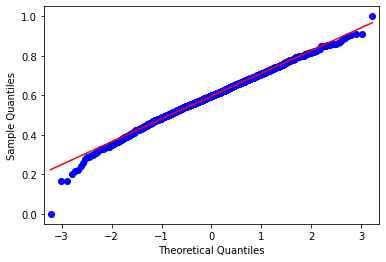

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


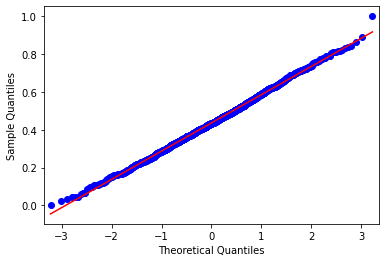

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


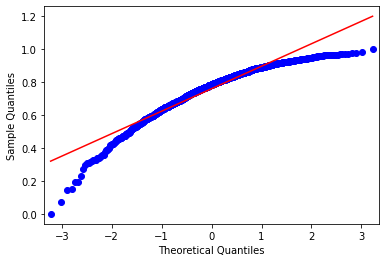

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


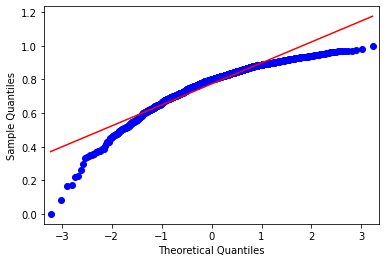

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


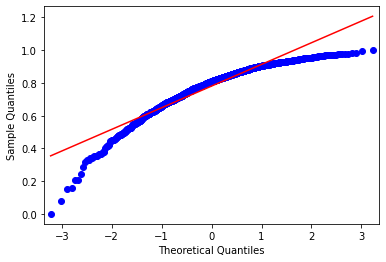

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


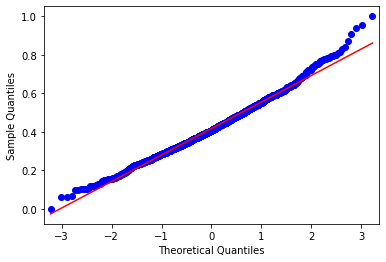

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


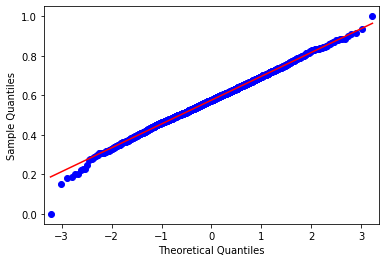

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


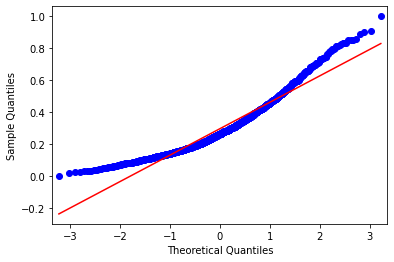

In [21]:
for measure in measures:
    qqplot(np.array(ms[measure]), line='s')
    pyplot.show()

In [22]:
weights ={measure : 0.5 for measure in measures}

In [23]:
matrix_prediction = similarity.same_prediction(weights)

step 1/431 : 0.7653830051422119sec
step 2/431 : 0.753673791885376sec
step 3/431 : 0.7567441463470459sec
step 4/431 : 0.7581527233123779sec
step 5/431 : 0.7566356658935547sec
step 6/431 : 0.7614617347717285sec
step 7/431 : 0.760932207107544sec
step 8/431 : 0.7638685703277588sec
step 9/431 : 0.7628822326660156sec
step 10/431 : 0.7605714797973633sec
step 11/431 : 0.7597734928131104sec
step 12/431 : 0.7731227874755859sec
step 13/431 : 0.7718846797943115sec
step 14/431 : 0.7661442756652832sec
step 15/431 : 0.7592587471008301sec
step 16/431 : 0.7611970901489258sec
step 17/431 : 0.7637913227081299sec
step 18/431 : 0.7634975910186768sec
step 19/431 : 0.772472620010376sec
step 20/431 : 0.7611191272735596sec
step 21/431 : 0.755239725112915sec
step 22/431 : 0.7671616077423096sec
step 23/431 : 0.7748751640319824sec
step 24/431 : 0.779728889465332sec
step 25/431 : 0.7651643753051758sec
step 26/431 : 0.7558417320251465sec
step 27/431 : 0.7607605457305908sec
step 28/431 : 0.7607603073120117sec
step 2

step 226/431 : 0.7831566333770752sec
step 227/431 : 0.7699990272521973sec
step 228/431 : 0.7631001472473145sec
step 229/431 : 0.7610011100769043sec
step 230/431 : 0.7822446823120117sec
step 231/431 : 0.8001375198364258sec
step 232/431 : 0.7783524990081787sec
step 233/431 : 0.7944793701171875sec
step 234/431 : 0.8383948802947998sec
step 235/431 : 0.8203372955322266sec
step 236/431 : 0.7703526020050049sec
step 237/431 : 0.7662267684936523sec
step 238/431 : 0.7621042728424072sec
step 239/431 : 0.7542364597320557sec
step 240/431 : 0.7623884677886963sec
step 241/431 : 0.7572522163391113sec
step 242/431 : 0.7543900012969971sec
step 243/431 : 0.7558450698852539sec
step 244/431 : 0.7588269710540771sec
step 245/431 : 0.765204906463623sec
step 246/431 : 0.7753322124481201sec
step 247/431 : 0.7564780712127686sec
step 248/431 : 0.7580065727233887sec
step 249/431 : 0.7678766250610352sec
step 250/431 : 0.7664170265197754sec
step 251/431 : 0.7673604488372803sec
step 252/431 : 0.761998176574707sec
ste

In [24]:
matrix_prediction

JSD     cosine  chebyshev         L2  minkowski   canberra  \
JSD                  0  139425462  203258442  164468358  187283148  192702702   
cosine       139425462          0  199107058  171954442  187048924  296549208   
chebyshev    203258442  199107058          0   60883544   32924694  281760052   
L2           164468358  171954442   60883544          0   31637496  268597776   
minkowski    187283148  187048924   32924694   31637496          0  276725250   
canberra     192702702  296549208  281760052  268597776  276725250          0   
manhattan     54585220  163456042  223805190  187084120  209198588  179429698   
correlation  262286426  195506686  346127890  334315348  342222596  339786926   

             manhattan  correlation  
JSD           54585220    262286426  
cosine       163456042    195506686  
chebyshev    223805190    346127890  
L2           187084120    334315348  
minkowski    209198588    342222596  
canberra     179429698    339786926  
manhattan            0    266950722  
correlation  266950722            0

In [25]:
(1-matrix_prediction/matrix_prediction.max().max()).style.background_gradient(cmap='Reds')

In [26]:
(1-matrix_prediction).style.background_gradient(cmap='Reds')

### Evaluation of performance

In [11]:
field, tag = similarity.evaluation(data_eval, measures)

In [12]:
classified_field_pie = {measure : [] for measure in measures}
classified_tag_pie = {measure : [] for measure in measures}
for f, t, measure in zip(field.values(), tag.values(), measures):
    print(measure)
    display(f.style.background_gradient(cmap="Reds"))
    display(t.style.background_gradient(cmap="Reds"))
    classified_field_pie[measure] = [f['Well classified field'].sum(axis=0),f['Badly classified field'].sum(axis=0)]
    classified_tag_pie[measure] = [t['Well classified tag'].sum(axis=0),t['Badly classified tag'].sum(axis=0)]

JSD


cosine


chebyshev


L2


minkowski


braycurtis


canberra


manhattan


correlation


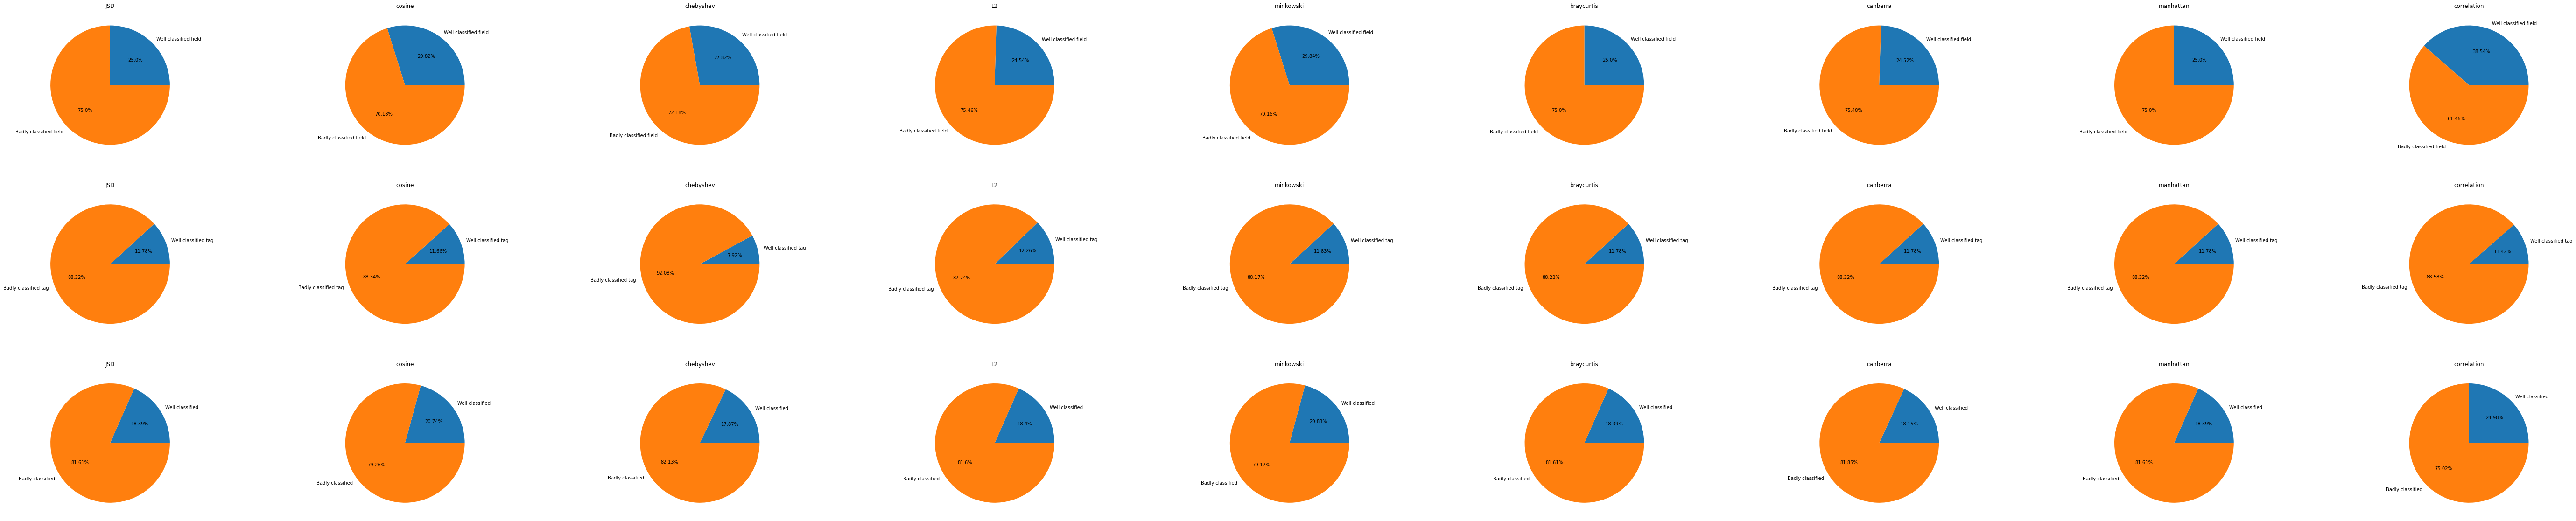

In [13]:
fig, ax = plt.subplots(3,len(measures), figsize=(100, 20))
for i,measure in enumerate(measures):
    
    # create a figure with two subplots
    
    ax[0][i].pie(classified_field_pie[measure], labels = ["Well classified field","Badly classified field"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[0][i].set_title(measure)
    ax[1][i].pie(classified_tag_pie[measure], labels = ["Well classified tag","Badly classified tag"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[1][i].set_title(measure)
    ax[2][i].pie([field+tag for field,tag in zip(classified_field_pie[measure],classified_tag_pie[measure])], labels = ["Well classified","Badly classified"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[2][i].set_title(measure)

In [14]:
field2, tag2 = similarity.evaluation2(data_eval, measures)

In [15]:
classified_field_pie = {measure : [] for measure in measures}
classified_tag_pie = {measure : [] for measure in measures}
for f, t, measure in zip(field2.values(), tag2.values(), measures):
    print(measure)
    display(f.style.background_gradient(cmap="Reds"))
    display(t.style.background_gradient(cmap="Reds"))
    classified_field_pie[measure] = [f['Well classified field'].sum(axis=0),f['Badly classified field'].sum(axis=0)]
    classified_tag_pie[measure] = [t['Well classified tag'].sum(axis=0),t['Badly classified tag'].sum(axis=0)]

JSD


cosine


chebyshev


L2


minkowski


braycurtis


canberra


manhattan


correlation


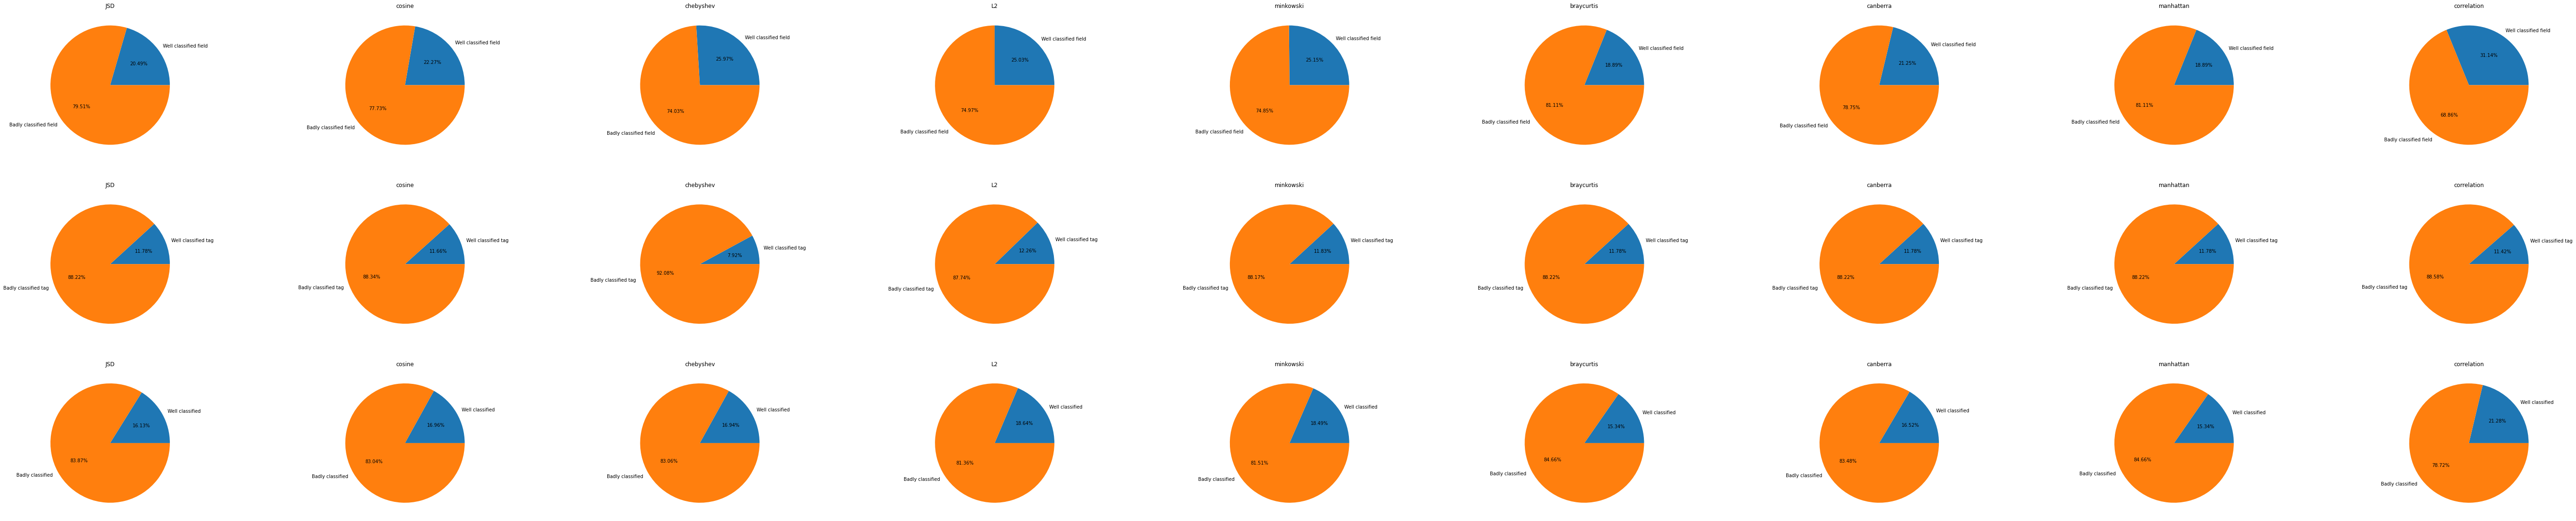

In [16]:
fig, ax = plt.subplots(3,len(measures), figsize=(100, 20))
for i,measure in enumerate(measures):
    
    # create a figure with two subplots
    
    ax[0][i].pie(classified_field_pie[measure], labels = ["Well classified field","Badly classified field"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[0][i].set_title(measure)
    ax[1][i].pie(classified_tag_pie[measure], labels = ["Well classified tag","Badly classified tag"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[1][i].set_title(measure)
    ax[2][i].pie([field+tag for field,tag in zip(classified_field_pie[measure],classified_tag_pie[measure])], labels = ["Well classified","Badly classified"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
    ax[2][i].set_title(measure)

    We can see that the model has bas result. Maybe the way to do the topic translation can be enhaunced but it seems more interestiong to prioritized version 1 and 3

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,

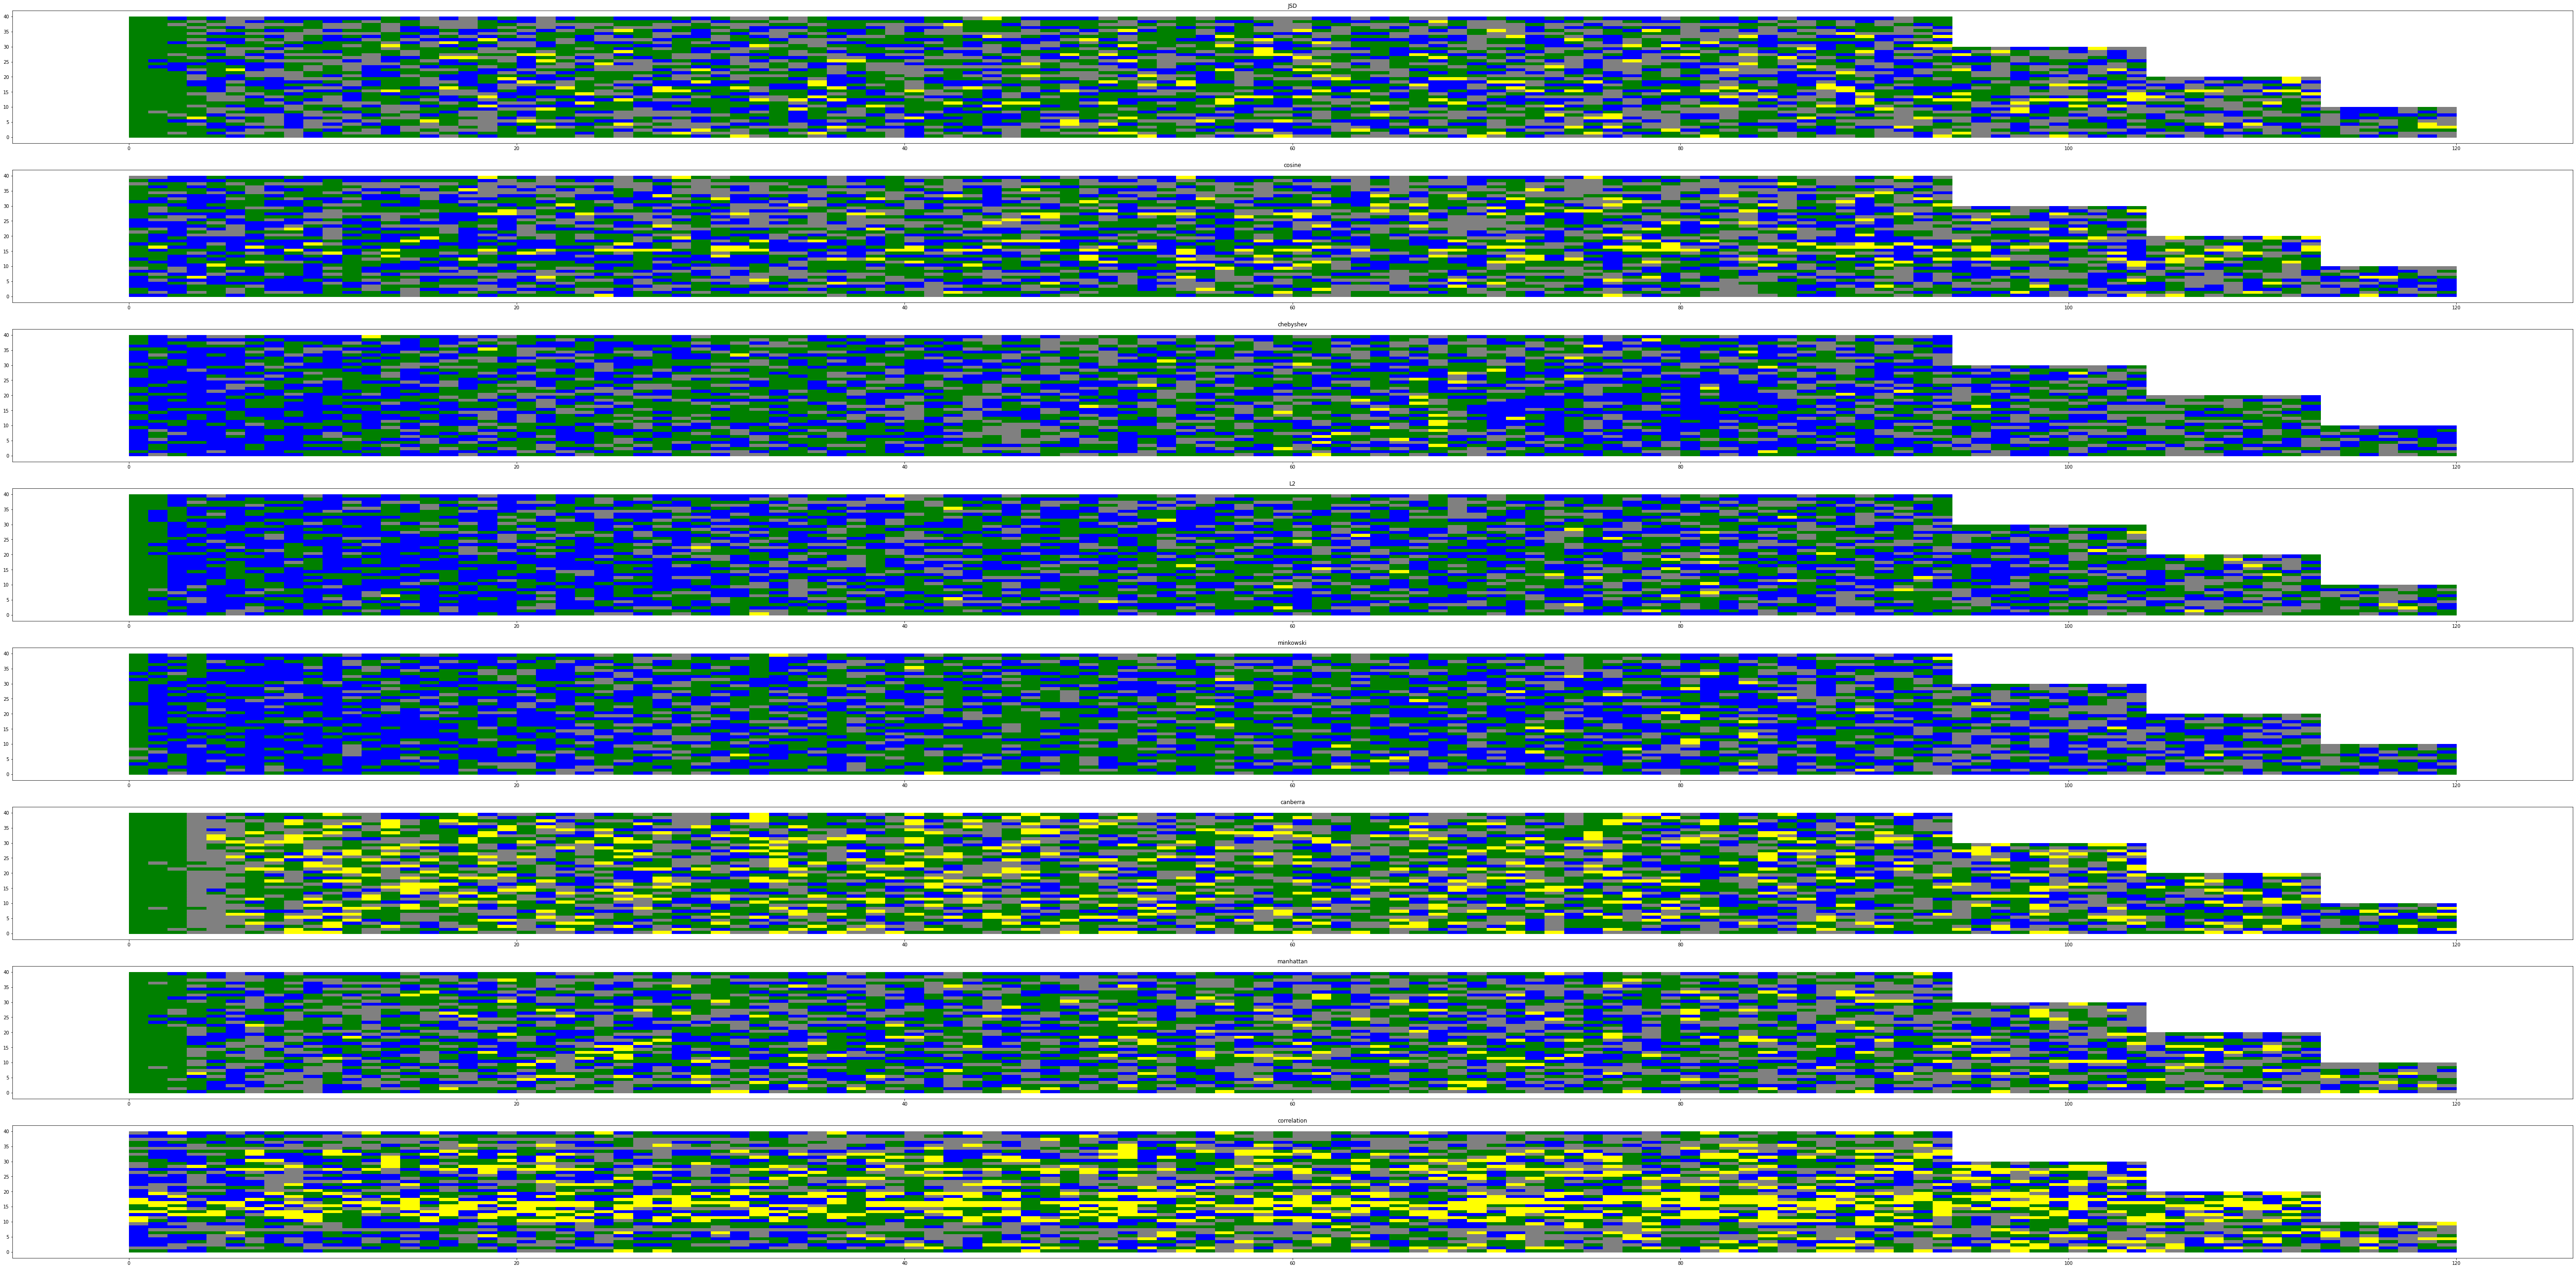

In [12]:
fig, ax = similarity.repartition_similarity(data_eval, measures)

In [13]:
fig.savefig("Saved Data/repartition1_V2")